In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wd
import cmath
from matplotlib.patches import Circle
import matplotlib.image as mpimg
from PIL import Image, ImageDraw
import matplotlib as mpl

# Mandelbrotfolge

In [6]:
def mandelbrot_folge(c, n):
    u = np.zeros(n, dtype=complex)
    u[0] = 0
    for i in range(n-1):
        if(abs(u[i])<=100):
            u[i+1] = u[i]**2 + c
        else:
            return u
    return u

<IPython.core.display.Javascript object>


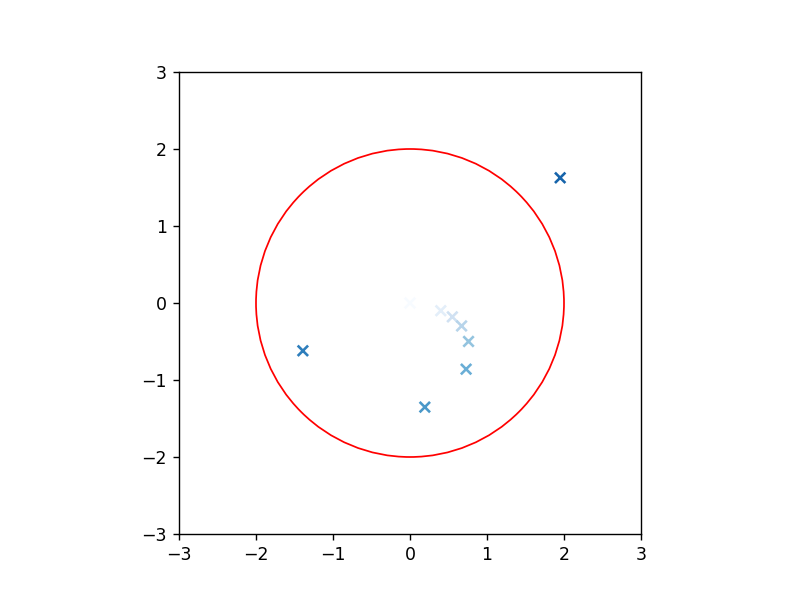

interactive(children=(FloatSlider(value=0.0, description='realteil', max=3.0, min=-3.0), FloatSlider(value=0.0…

In [19]:
fig, ax = plt.subplots()

@wd.interact(realteil=wd.FloatSlider(min=-3, max=3, value=0, steps=100),
             imaginaerteil=wd.FloatSlider(min=-3, max=3, value=0, steps=100),
             n=wd.IntSlider(min=1, max=100, value=10),
             xb=wd.FloatSlider(min=1, max=100, value=3),
             yb=wd.FloatSlider(min=1, max=100, value=3))
def plot_folge(realteil, imaginaerteil, n, xb, yb):
    cm = mpl.cm.get_cmap('Blues')
    t = [cm(e/n) for e in np.arange(n)]
    ax.clear()
    c = complex(realteil, imaginaerteil)
    u = mandelbrot_folge(c, n)
    ax.scatter([ui.real for ui in u],
               [ui.imag for ui in u], marker='x', c=t)
    drawObject = Circle((0, 0), radius=2, fill=False, color="red")
    ax.add_patch(drawObject)
    ax.set_xlim([-xb, xb])
    ax.set_ylim([-yb,yb])
    ax.set_aspect('equal')

# Mandelbrotmenge

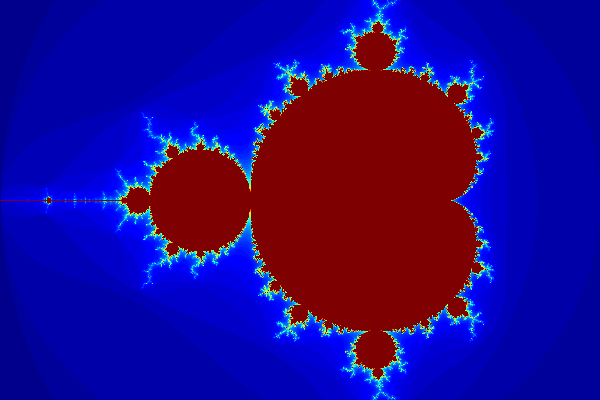

In [9]:
max_iterations = 80
def mandelbrot(c):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iterations:
        z = z * z + c
        n += 1
    return n, z

# Bildgröße in Pixeln
width = 600
height = 400

# Koordinatenfenster zum Plotten
re_bound_low = -2
re_bound_high = 1
im_bound_low = -1
im_bound_high = 1

# color map
cm = mpl.cm.get_cmap('jet') # viridis, plasma, inferno, magma, cividis, jet


im = Image.new('RGB', (width, height), (0, 0, 0))
draw = ImageDraw.Draw(im)

for x in range(0, width):
    for y in range(0, height):
        c = complex(re_bound_low + (x / width) * (re_bound_high - re_bound_low),
                    im_bound_low + (y / height) * (im_bound_high - im_bound_low))
        m, z = mandelbrot(c)
        draw.point([x, y], tuple((np.array((cm(m/max_iterations))[:3])*255).astype(int)))
im